# **PRiAD - projekt**

### Skład zepsołu:
* Daria Danieluk
* Kateryna Kononova
* Weronika Zbierowska

## Cel projektu
Projekt polega na wykonaniu analizy zbioru danych CIC-Darnket2020 zawierającego dane o ruchu sieciowym. Celem jest przeprowadzenie 2 rodzajów klasyfikacji: binarnej TOR vs NonTOR oraz klasyfikacji ruchu według rodzaju usługi.

## Opis zbioru danych

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cols_list = ['Total Length of Fwd Packet', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Packet Length Min', 'Packet Length Max', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'Label', 'Label.1']
df = pd.read_csv('Darknet.CSV', usecols=cols_list)
df = df.loc[(df['Label'] == 'Tor') | (df['Label'] == 'Non-Tor')]
df.head()

,Total Length of Fwd Packet,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Packet Length Min,Packet Length Max,FIN Flag Count,SYN Flag Count,RST Flag Count,Label,Label.1
0,0,0,0,0,0,20,20,0,0,2,0,0,Non-Tor,AUDIO-STREAMING
1,0,0,0,0,0,20,20,0,0,2,0,0,Non-Tor,AUDIO-STREAMING
2,0,0,0,0,0,20,20,0,0,2,0,0,Non-Tor,AUDIO-STREAMING
3,0,0,0,0,0,20,20,0,0,2,0,0,Non-Tor,AUDIO-STREAMING
4,64530,1,0,0,0,11820,8000,0,498,1,0,0,Non-Tor,AUDIO-STREAMING


In [8]:
print("Liczba wierszy = ", df.shape[0])
print("Liczba kolumn = ", df.shape[1])
df.info()

Liczba wierszy =  94748
Liczba kolumn =  14
<class 'pandas.core.frame.DataFrame'>
Int64Index: 94748 entries, 0 to 118610
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Total Length of Fwd Packet  94748 non-null  int64 
 1   Fwd PSH Flags               94748 non-null  int64 
 2   Bwd PSH Flags               94748 non-null  int64 
 3   Fwd URG Flags               94748 non-null  int64 
 4   Bwd URG Flags               94748 non-null  int64 
 5   Fwd Header Length           94748 non-null  int64 
 6   Bwd Header Length           94748 non-null  int64 
 7   Packet Length Min           94748 non-null  int64 
 8   Packet Length Max           94748 non-null  int64 
 9   FIN Flag Count              94748 non-null  int64 
 10  SYN Flag Count              94748 non-null  int64 
 11  RST Flag Count              94748 non-null  int64 
 12  Label                       94748 non-null  object
 13  L

Wybrana część zbioru danych CIC-Darknet2020 składa się z 94748 wierszy i 14 kolumn - 12 atrybutów opisujących i 2 atrybutów decyzyjnych.

### *[tu wstawić opis kolumn]*

## Analiza ekploracyjna danych

### Braki w danych

In [17]:
print("Liczba brakujących danych = ", df.isnull().sum().sum())

Liczba brakujących danych =  0


W zbiorze nie występują żadne braki w danych.

### Podstawowe statystyki na temat atrybutów opisujących w zbiorze

In [23]:
df.describe()

,Total Length of Fwd Packet,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Packet Length Min,Packet Length Max,FIN Flag Count,SYN Flag Count,RST Flag Count
count,9.474800e+04,94748.000000,94748.0,94748.0,94748.0,9.474800e+04,9.474800e+04,94748.000000,94748.000000,94748.000000,94748.000000,94748.000000
mean,1.285454e+05,0.120762,0.0,0.0,0.0,2.954200e+03,2.605246e+03,7.753947,333.975208,0.604783,0.627443,0.027367
std,2.305133e+06,0.325853,0.0,0.0,0.0,3.820125e+04,3.005228e+04,17.224699,580.153254,0.566279,0.928077,0.212689
min,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,0.0,0.0,0.0,2.000000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000e+01,0.000000,0.0,0.0,0.0,4.000000e+01,2.000000e+01,0.000000,52.000000,1.000000,0.000000,0.000000
75%,4.460000e+02,0.000000,0.0,0.0,0.0,1.120000e+02,9.200000e+01,0.000000,407.250000,1.000000,2.000000,0.000000
max,1.434918e+08,1.000000,0.0,0.0,0.0,2.279200e+06,1.632600e+06,1350.000000,33450.000000,2.000000,3.000000,16.000000


Już na pierwszy rzut oka można zauważyć charakterystyczne zakresy wartości niektórych atrybutów.  
Na przykład:
* wartości atrybutów `Bwd PSH Flags`, `Fwd URG Flags` oraz `Bwd URG Flags` są równe 0 dla wszystkich obiektów
* wartości atrybutu `Fwd PSH Flags` zmieniają się w zakresie <0, 1>
* wartości atrybutu `FIN Flag Count` zmieniają się w zakresie <0, 2>
* wartości atrybutu `SYN Flag Count` zmieniają się w zakresie <0, 3>
* wartości atrybutu `RST Flag Count` zmieniają się w zakresie <0, 16>  
  
Ich dokładny rozkład zostanie poddany analizie w dalszej części.

### Podstawowe statystyki na temat atrybutów opisujących - porównanie Tor vs Non-Tor

In [24]:
print("Liczba obiektów w klasie Non-Tor = ", df[df['Label'] == 'Non-Tor'].shape[0])
df[df['Label'] == 'Non-Tor'].describe()

Liczba obiektów w klasie Non-Tor =  93356


,Total Length of Fwd Packet,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Packet Length Min,Packet Length Max,FIN Flag Count,SYN Flag Count,RST Flag Count
count,9.335600e+04,93356.000000,93356.0,93356.0,93356.0,9.335600e+04,9.335600e+04,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000
mean,3.714035e+04,0.113126,0.0,0.0,0.0,1.117060e+03,1.256511e+03,7.828174,319.667981,0.612183,0.635546,0.027561
std,1.087435e+06,0.316749,0.0,0.0,0.0,1.670923e+04,1.924600e+04,17.217206,527.000946,0.565198,0.931203,0.213017
min,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,0.0,0.0,0.0,2.000000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000e+01,0.000000,0.0,0.0,0.0,4.000000e+01,2.000000e+01,0.000000,52.000000,1.000000,0.000000,0.000000
75%,4.090000e+02,0.000000,0.0,0.0,0.0,1.120000e+02,9.200000e+01,0.000000,328.000000,1.000000,2.000000,0.000000
max,8.014597e+07,1.000000,0.0,0.0,0.0,1.110420e+06,1.077432e+06,1350.000000,1460.000000,2.000000,2.000000,16.000000


In [25]:
print("Liczba obiektów w klasie Tor = ", df[df['Label'] == 'Tor'].shape[0])
df[df['Label'] == 'Tor'].describe()

Liczba obiektów w klasie Tor =  1392


,Total Length of Fwd Packet,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Packet Length Min,Packet Length Max,FIN Flag Count,SYN Flag Count,RST Flag Count
count,1.392000e+03,1392.000000,1392.0,1392.0,1392.0,1.392000e+03,1.392000e+03,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000
mean,6.258728e+06,0.632902,0.0,0.0,0.0,1.261640e+05,9.305965e+04,2.775862,1293.505029,0.108477,0.084052,0.014368
std,1.563346e+07,0.482187,0.0,0.0,0.0,2.554321e+05,1.683665e+05,17.001629,1830.630880,0.390966,0.414654,0.189047
min,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.086000e+03,0.000000,0.0,0.0,0.0,9.600000e+01,9.600000e+01,0.000000,543.000000,0.000000,0.000000,0.000000
50%,1.034085e+05,1.000000,0.0,0.0,0.0,1.629000e+04,3.932000e+04,0.000000,1460.000000,0.000000,0.000000,0.000000
75%,1.705210e+06,1.000000,0.0,0.0,0.0,1.095050e+05,9.442500e+04,0.000000,1460.000000,0.000000,0.000000,0.000000
max,1.434918e+08,1.000000,0.0,0.0,0.0,2.279200e+06,1.632600e+06,191.000000,33450.000000,2.000000,3.000000,3.000000


Obserwując jedynie zakresy wartości poszczególnych atrybutów opisujących można wyciągnąć następujące wnioski:
* obiekty o wartości atrybutu `Total Length of Fwd Packet` > 8.014597e+07 występują jedynie w klasie `Tor`
* atrybuty `Fwd PSH Flags`, `Bwd PSH Flags`, `Fwd URG Flags`, `Bwd URG Flags` oraz `FIN Flag Count` nie umożliwiają odróżnienia obiektów klasy `Tor` od obiektów klasy `Non-Tor`
* obiekty o wartości atrybutu `Fwd Header Length` > 1.110420e+06 występują jedynie w klasie `Tor`
* obiekty o wartości atrybutu `Bwd Header Length` > 1.077432e+06 występują jedynie w klasie `Tor`
* obiekty o wartości atrybutu `Packet Length Min` > 191 występują jedynie w klasie `Non-Tor`
* obiekty o wartości atrybutu `Packet Length Max` > 1460 występują jedynie w klasie `Tor`
* obiekty o wartości atrybutu `SYN Flag Count` > 2 występują jedynie w klasie `Tor`
* obiekty o wartości atrybutu `RST Flag Count` > 3 występują jedynie w klasie `Non-Tor`

### Analiza kategorii ruchu

In [34]:
print("Liczba kategorii ruchu = ", len(df.loc[:, 'Label.1'].unique()))

Liczba kategorii ruchu =  10


In [33]:
# może redukcja liczby klas? TODO
print("Liczba obiektów w danej klasie:")
for k in list(df.loc[:, 'Label.1'].unique()):
    print(k, " = ", df[df['Label.1'] == k].shape[0])

Liczba obiektów w danej klasie:
AUDIO-STREAMING  =  1484
Browsing  =  32808
Chat  =  478
Email  =  505
File-Transfer  =  6800
File-transfer  =  47
P2P  =  48520
Video-Streaming  =  3584
Audio-Streaming  =  224
VOIP  =  298


In [35]:
# może dodać porównanie częstości występowania flag TCP w różnych kategoriach ruchu? TODO
df.groupby('Label.1').mean()

,Total Length of Fwd Packet,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Packet Length Min,Packet Length Max,FIN Flag Count,SYN Flag Count,RST Flag Count
Label.1,,,,,,,,,,,,
AUDIO-STREAMING,4.188126e+04,0.198787,0.0,0.0,0.0,6855.873315,5856.471698,8.225067,596.014825,0.320081,0.299191,0.010782
Audio-Streaming,6.348057e+04,0.848214,0.0,0.0,0.0,10976.160714,26924.107143,0.000000,1151.982143,0.133929,0.089286,0.008929
Browsing,2.828127e+03,0.054133,0.0,0.0,0.0,360.800171,505.794440,11.119117,345.995458,0.608358,0.626189,0.032370
Chat,1.955330e+04,0.209205,0.0,0.0,0.0,1331.991632,1572.158996,11.577406,545.575314,0.410042,0.368201,0.008368
Email,6.709763e+05,0.154455,0.0,0.0,0.0,11569.885149,7597.283168,12.419802,463.603960,0.469307,0.475248,0.132673
File-Transfer,7.556602e+05,0.031765,0.0,0.0,0.0,11869.477647,6207.990588,4.501765,574.062500,0.614412,0.862059,0.128676
File-transfer,1.343774e+07,0.234043,0.0,0.0,0.0,189723.148936,34486.723404,0.000000,884.957447,0.468085,0.553191,0.000000
P2P,8.937683e+04,0.168261,0.0,0.0,0.0,2173.794394,2132.459852,5.638994,258.619951,0.630214,0.628854,0.004740
VOIP,8.216567e+05,0.647651,0.0,0.0,0.0,54568.510067,55347.020134,4.030201,1148.419463,0.167785,0.117450,0.057047


### Rozkład wartości atrybutów opisujących w zbiorze danych

<AxesSubplot:>

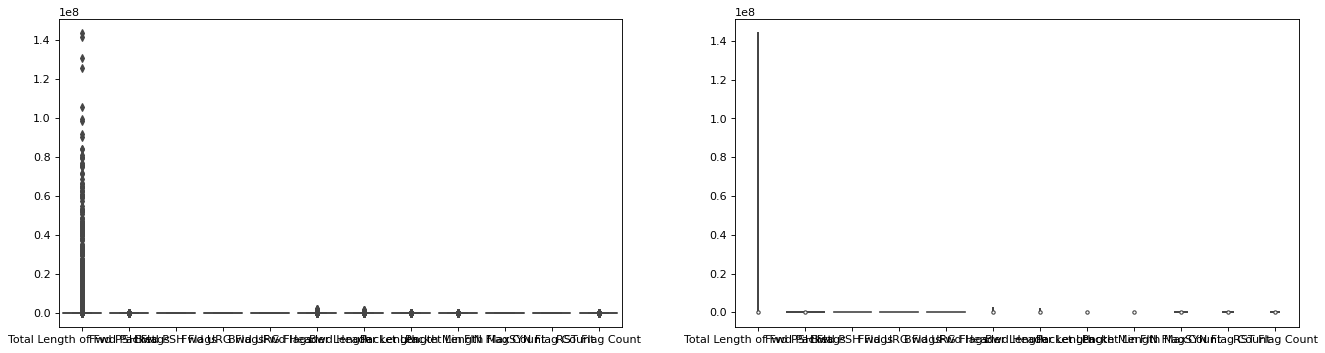

In [38]:
# trzeba jakoś inaczej, bo zakresy są bardzo różne TODO
plt.figure(figsize=(20, 5), dpi=80)
plt.subplot(1, 2, 1)
sns.boxplot(data=df)
plt.subplot(1, 2, 2)
sns.violinplot(data=df)

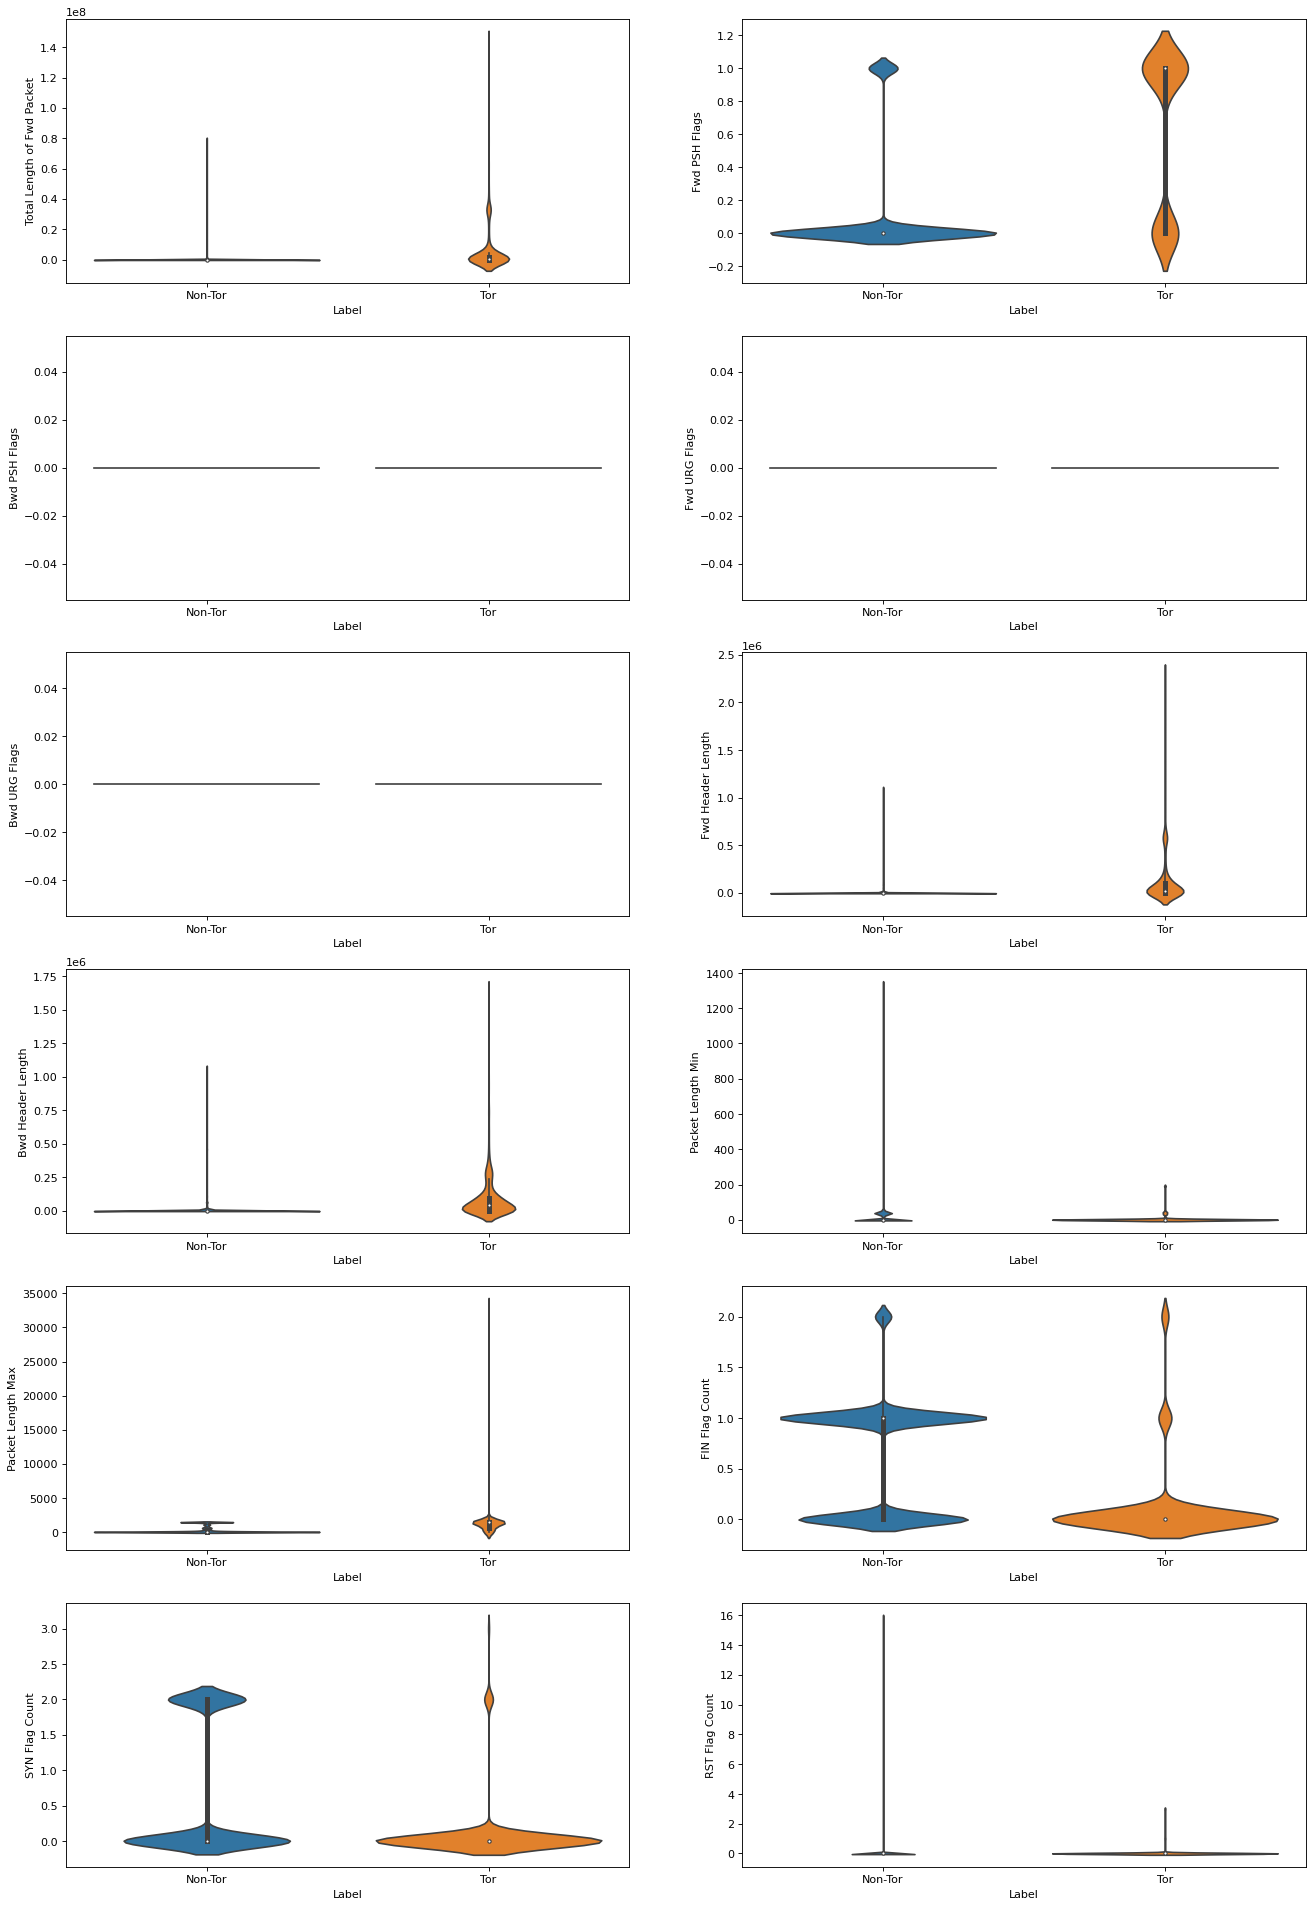

In [46]:
# nie wiem czy to ma sens TODO
plt.figure(figsize=(20, 30), dpi=80)
nr = 1
for atr in df.columns[:-2]:
    plt.subplot(6, 2, nr)
    nr += 1
    sns.violinplot(data=df, x='Label', y=atr)